In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Input , Lambda , Dense , Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3 , preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

print(tf.__version__)

2.4.1


In [2]:
train_size = [224 , 224]

train_path = '/content/drive/MyDrive/MyShares/Tomatos/train'
val_path =  '/content/drive/MyDrive/MyShares/Tomatos/valid'

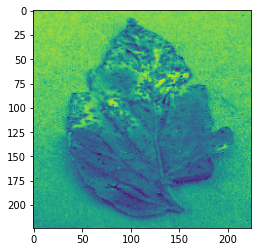

In [3]:
path = '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Bacterial_spot'

for image_1 in os.listdir(path):
  image_array = cv2.imread(os.path.join(path , image_1) , cv2.IMREAD_GRAYSCALE)
  new_array = cv2.resize(image_array , (train_size[0]  , train_size[0] ))
  plt.imshow(new_array)
  plt.show()
  break
  

In [4]:
inception = InceptionV3(input_shape=train_size+ [3], include_top=False , weights='imagenet')

87916544/87910968 [==============================] - 0s 0us/step


In [5]:
for layer in inception.layers:
  layer.trainable = False

In [6]:
from glob import glob

folders = glob('/content/drive/MyDrive/MyShares/Tomatos/train/*')

folders

['/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Early_blight',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___healthy',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Late_blight',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/MyShares/Tomatos/train/Tomato___Bacterial_spot']

In [7]:
num_of_classes = len(folders)
print(num_of_classes)

10


In [8]:
x = Flatten()(inception.output)
x = Dense(num_of_classes , activation = 'softmax')(x)

model = Model(inputs = inception.input , outputs = x)

In [9]:

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [10]:
from tensorflow.keras.optimizers import Adam

adam = Adam(lr = 0.001)

model.compile(optimizer = adam , loss = 'categorical_crossentropy' ,
              metrics = ['accuracy'])

In [11]:
training_batch_size = 512
val_batch_size = 128



train_datagen = ImageDataGenerator(rescale=1./255 , shear_range=0.2 , 
                                   zoom_range=0.2 , rotation_range = 40 , 
                                   width_shift_range = 0.2 , 
                                   height_shift_range = 0.2 , 
                                   fill_mode = 'nearest',  horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path , target_size = (224 , 224) , 
                                                 batch_size = training_batch_size ,
                                                 class_mode = 'categorical')

val_set = val_datagen.flow_from_directory(val_path , target_size = (224 , 224) ,
                                          batch_size = val_batch_size ,
                                          class_mode = 'categorical')


print(len(training_set))
print(len(val_set))

Found 18349 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.
36
36


In [12]:
classes = training_set.class_indices

disease_class = {value: key for key, value in classes.items()}

print(disease_class)

{0: 'Tomato___Bacterial_spot', 1: 'Tomato___Early_blight', 2: 'Tomato___Late_blight', 3: 'Tomato___Leaf_Mold', 4: 'Tomato___Septoria_leaf_spot', 5: 'Tomato___Spider_mites Two-spotted_spider_mite', 6: 'Tomato___Target_Spot', 7: 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 8: 'Tomato___Tomato_mosaic_virus', 9: 'Tomato___healthy'}


In [17]:
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self , epochs , logs = {}):
    if (logs.get('accuracy')>=0.92):
      print('desired accuracy reached , training stopped')
      model.stop_training = True

callback = mycallback()

In [18]:

history = model.fit(training_set , validation_data=val_set , epochs = 20 , 
                              steps_per_epoch=len(training_set),
                              validation_steps = len(val_set) , verbose = 1 , callbacks = [callback])

Epoch 1/20
36/36 [==============================] - 4717s 130s/step - loss: 20.7772 - accuracy: 0.1838 - val_loss: 3.7264 - val_accuracy: 0.4827
Epoch 2/20
36/36 [==============================] - 236s 7s/step - loss: 2.5212 - accuracy: 0.5999 - val_loss: 0.9866 - val_accuracy: 0.7361
Epoch 3/20
36/36 [==============================] - 236s 7s/step - loss: 0.9196 - accuracy: 0.7519 - val_loss: 0.7451 - val_accuracy: 0.7621
Epoch 4/20
36/36 [==============================] - 235s 7s/step - loss: 0.6781 - accuracy: 0.7860 - val_loss: 0.6886 - val_accuracy: 0.7710
Epoch 5/20
36/36 [==============================] - 233s 6s/step - loss: 0.6281 - accuracy: 0.7939 - val_loss: 0.6268 - val_accuracy: 0.7845
Epoch 6/20
36/36 [==============================] - 233s 6s/step - loss: 0.6014 - accuracy: 0.8034 - val_loss: 0.6123 - val_accuracy: 0.7887
Epoch 7/20
36/36 [==============================] - 233s 6s/step - loss: 0.5630 - accuracy: 0.8119 - val_loss: 0.5485 - val_accuracy: 0.8122
Epoch 8/2

In [19]:
model.save('/content/drive/MyDrive/MyShares/Tomatos/tomato_leaf_disease1.h5')

In [24]:
#model.load_weights('/content/drive/MyDrive/MyShares/Tomatos/tomato_leaf_disease.h5')

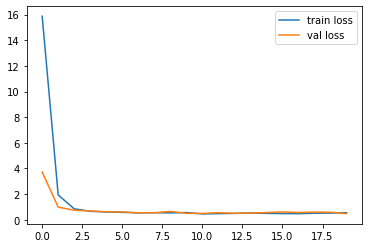

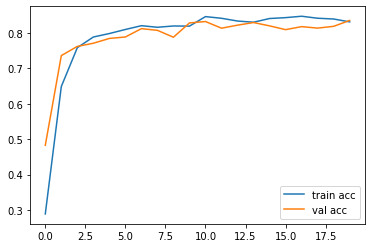

<Figure size 432x288 with 0 Axes>

In [21]:
# plot the loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [29]:
from tensorflow.keras.preprocessing.image import img_to_array
import os

def prepare_for_pred(filepath):
  img = load_img(filepath , target_size=(224,224))
  img_arr = img_to_array(img)
  img_arr = img_arr/255.
  img_arr=np.expand_dims(img_arr,axis=0)
  return img_arr


# prediction = model.predict(prepare_for_pred('/content/drive/MyDrive/MyShares/Tomatos/test/healthy.JPG'))
# print(prediction)
# print(np.argmax(prediction[0]))

test_list_path = '/content/drive/MyDrive/MyShares/Tomatos/test'
for image in os.listdir(test_list_path):
  image_array = cv2.imread(os.path.join(test_list_path , image) , cv2.IMREAD_GRAYSCALE)
  pred = model.predict(prepare_for_pred(os.path.join(test_list_path , image)))
  predc = np.argmax(pred , axis = 1)
  print(image)
  print('the predicted class is  ' ,  disease_class[predc[0]])
  print()

yellow leaf virus.jpg
the predicted class is   Tomato___Septoria_leaf_spot

early-blight.jpg
the predicted class is   Tomato___Early_blight

late_blight_tomato.jpg
the predicted class is   Tomato___Late_blight

bacterial_spot_tomato.jpg
the predicted class is   Tomato___Septoria_leaf_spot

Bacterial_spot.jpg
the predicted class is   Tomato___Septoria_leaf_spot

mosiac virus.JPG
the predicted class is   Tomato___Tomato_mosaic_virus

mosiac virus1.JPG
the predicted class is   Tomato___Tomato_mosaic_virus

bacterial spot.JPG
the predicted class is   Tomato___Bacterial_spot

batterial spot1.JPG
the predicted class is   Tomato___Septoria_leaf_spot

late blight1.JPG
the predicted class is   Tomato___Early_blight

septoria leaf spot.JPG
the predicted class is   Tomato___Septoria_leaf_spot

septoria leaf spot1.JPG
the predicted class is   Tomato___Septoria_leaf_spot

healthy.JPG
the predicted class is   Tomato___healthy

healthy1.JPG
the predicted class is   Tomato___healthy

Leaf_Mold.jpg
the